In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt   
import seaborn as sns
import sklearn as an 


In [7]:
import seaborn as sns

In [156]:
medical = pd.read_csv('cost_prediction.csv')
medical 


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [157]:
medical.shape

(1338, 7)

In [158]:
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [159]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [160]:
medical.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\HP\AppData\Local\Temp\ipykernel_55564\3704784687.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical['age'])


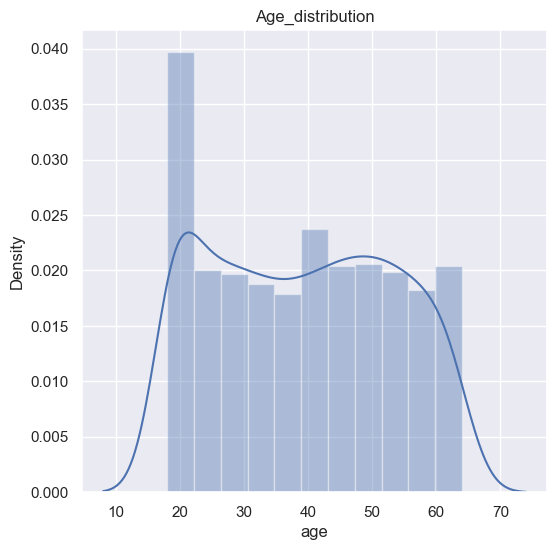

In [161]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(medical['age'])
plt.title('Age_distribution')
plt.show()

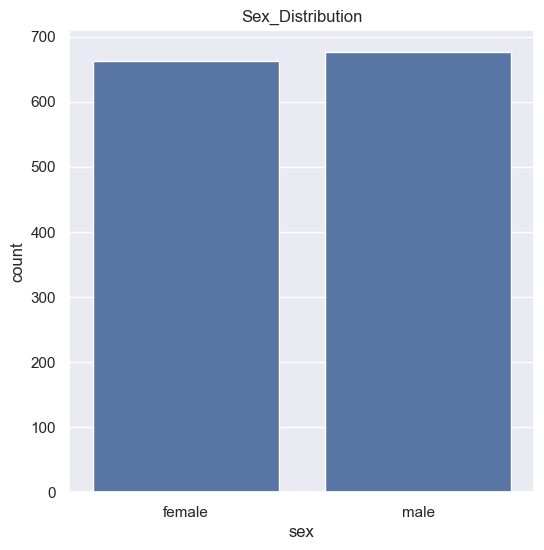

In [162]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'sex' , data=medical)
plt.title('Sex_Distribution')
plt.show()

In [163]:
medical['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_55564\1925884531.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medical['bmi'])


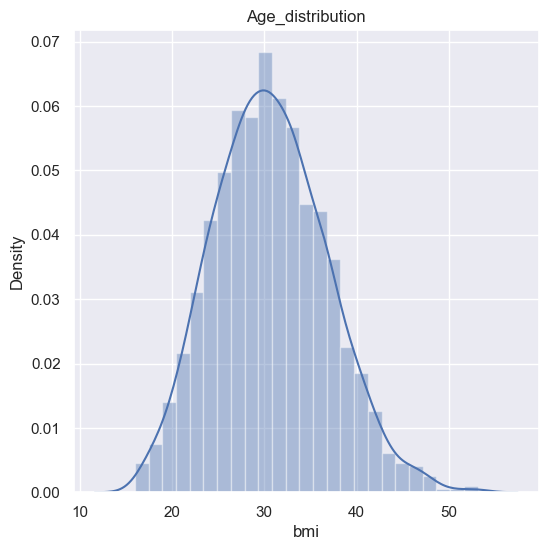

In [164]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(medical['bmi'])
plt.title('Age_distribution')
plt.show()

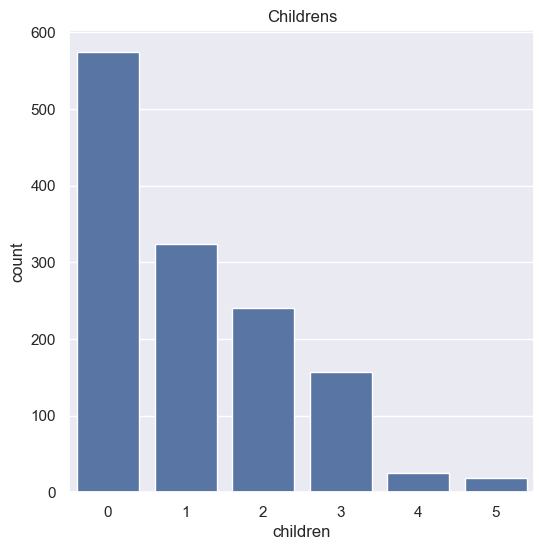

In [165]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'children' , data=medical)
plt.title('Childrens')
plt.show()

In [166]:
medical['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

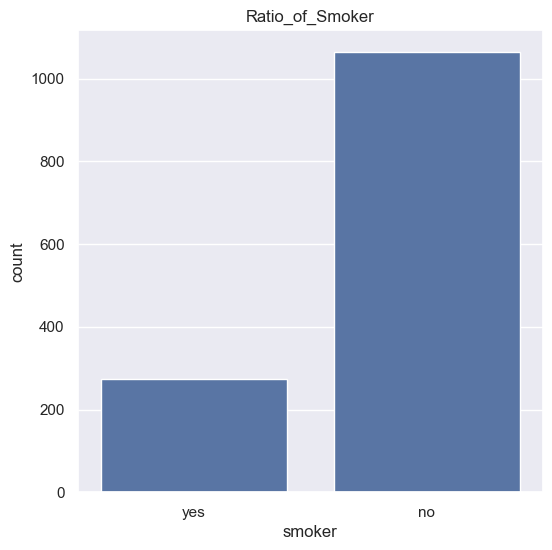

In [167]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'smoker' , data=medical)
plt.title('Ratio_of_Smoker')
plt.show()

In [168]:
medical['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

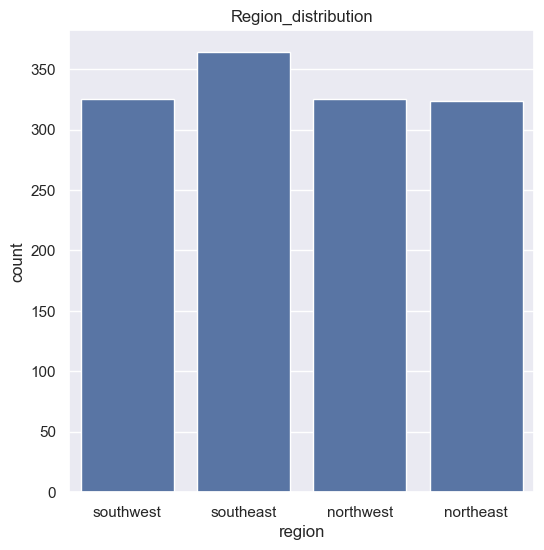

In [169]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'region' , data=medical)
plt.title('Region_distribution')
plt.show()

In [170]:
medical['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [171]:
medical['Sex'] = medical['sex'].apply(lambda x : 0 if x == 'male' else 1)
medical['Smoker'] = medical['smoker'].apply(lambda x : 0 if x == 'yes' else 1) 
medical

,age,sex,bmi,children,smoker,region,charges,Sex,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,1,1
1335,18,female,36.850,0,no,southeast,1629.83350,1,1
1336,21,female,25.800,0,no,southwest,2007.94500,1,1


In [172]:
medical.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [173]:
medical

,age,sex,bmi,children,smoker,region,charges,Sex,Smoker
0,19,female,27.900,0,yes,1,16884.92400,1,0
1,18,male,33.770,1,no,0,1725.55230,0,1
2,28,male,33.000,3,no,0,4449.46200,0,1
3,33,male,22.705,0,no,3,21984.47061,0,1
4,32,male,28.880,0,no,3,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,3,10600.54830,0,1
1334,18,female,31.920,0,no,2,2205.98080,1,1
1335,18,female,36.850,0,no,0,1629.83350,1,1
1336,21,female,25.800,0,no,1,2007.94500,1,1


In [174]:
medicals = medical.drop(['sex','smoker'],axis=1)
medicals
# sex : male == 0; female == 1; 
#Smoker : yes == 0, No == 1; 

,age,bmi,children,region,charges,Sex,Smoker
0,19,27.900,0,1,16884.92400,1,0
1,18,33.770,1,0,1725.55230,0,1
2,28,33.000,3,0,4449.46200,0,1
3,33,22.705,0,3,21984.47061,0,1
4,32,28.880,0,3,3866.85520,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,3,10600.54830,0,1
1334,18,31.920,0,2,2205.98080,1,1
1335,18,36.850,0,0,1629.83350,1,1
1336,21,25.800,0,1,2007.94500,1,1


In [175]:
inputs = medicals.drop('charges',axis=1)
inputs
target = medicals['charges'] 
target

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [221]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.2,random_state=0)

In [222]:
x_train

,age,bmi,children,region,Sex,Smoker
621,37,34.100,4,1,0,0
194,18,34.430,0,0,0,1
240,23,36.670,2,2,1,0
1168,32,35.200,2,1,0,1
1192,58,32.395,1,2,1,1
...,...,...,...,...,...,...
763,27,26.030,0,2,0,1
835,42,35.970,2,0,0,1
1216,40,25.080,0,0,0,1
559,19,35.530,0,3,0,1


In [223]:
x_test

,age,bmi,children,region,Sex,Smoker
578,52,30.200,1,1,0,1
610,47,29.370,1,0,1,1
569,48,40.565,2,3,0,0
1034,61,38.380,0,3,0,1
198,51,18.050,0,3,1,1
...,...,...,...,...,...,...
1084,62,30.495,2,3,1,1
726,41,28.405,1,3,0,1
1132,57,40.280,0,2,0,1
725,30,39.050,3,0,1,0


In [224]:
y_train

621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 1070, dtype: float64

In [225]:
from sklearn.linear_model import LinearRegression
model_reg = LinearRegression()


In [226]:
model_reg.fit(x_train,y_train)

LinearRegression()

In [227]:
y_predict = model_reg.predict(x_test)
y_predict

array([11314.55649519,  9505.58891773, 38360.58383815, 16449.59640407,
        7117.89379839,  3625.40607824,  1220.82286678, 14546.23034668,
        9175.38911418,  7670.45320003,  4137.50251413, 10460.04576612,
        8937.02424204,  3821.65458782, 28121.9236222 , 10727.21593537,
       11492.35478865,  5741.04672175,  8414.69398732, 26801.81210287,
       33848.38568362, 14527.74171334, 11390.85379777, 32180.53730024,
        4178.01083124,  8887.21190336,   744.58537141,  9803.59635122,
        3791.46686472, 10607.59311526,  9175.47238397, 40104.40338991,
       15833.68613995, 14020.43761781, 24429.83851219,  4812.11477907,
       12615.54616137, 30908.11622546, 33731.94909917,  3794.59535793,
        3636.61843919,  4007.71037332, 30202.73392169, 39695.63095105,
       27824.21897431,  5247.42299012, 10616.83293985,  8014.84064366,
        3241.96543926, 10245.23684269,  5352.03102501,  3581.85961167,
       33183.50761881, 38119.35302412, 16065.17314482,  6802.84856411,
      

In [228]:
score_1 = model_reg.score(x_test,y_test) 
score_1

0.7989875396812892

In [229]:
cofficient = model_reg.coef_
cofficient 



array([ 2.54257019e+02,  3.34493926e+02,  4.31796806e+02,  2.71181618e+02,
        1.11290912e+01, -2.36218658e+04])

In [230]:
intercept = model_reg.intercept_
intercept


10910.36238383535

In [231]:
y_test

578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
           ...     
1084    15019.76005
726      6664.68595
1132    20709.02034
725     40932.42950
963      9500.57305
Name: charges, Length: 268, dtype: float64

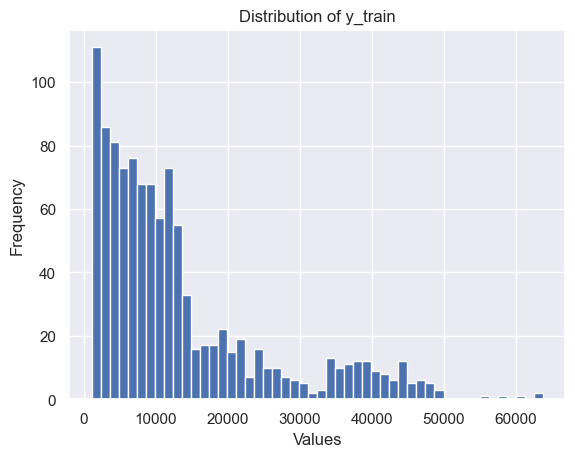

In [232]:
import matplotlib.pyplot as plt

plt.hist(y_train, bins=50)  # Visualize y_train distribution
plt.title('Distribution of y_train')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()


In [233]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled
x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled

y_train_reshaped = y_train.values.reshape(-1, 1)
y_train_scaled = scaler.fit_transform(y_train_reshaped)
y_test_reshaped = y_test.values.reshape(-1,1)
y_test_scaled = scaler.fit_transform(y_test_reshaped) 

y_predict_reshaped = y_predict.reshape(-1,1)
y_predict_scaled = scaler.fit_transform(y_predict_reshaped)
y_predict_scaled

array([[-0.18550918],
       [-0.35310988],
       [ 2.32030306],
       [ 0.29025185],
       [-0.57432964],
       [-0.89790834],
       [-1.12069278],
       [ 0.11390514],
       [-0.38370286],
       [-0.52313505],
       [-0.85046265],
       [-0.26467953],
       [-0.40578735],
       [-0.87972593],
       [ 1.37169202],
       [-0.23992623],
       [-0.16903618],
       [-0.70189441],
       [-0.4541812 ],
       [ 1.2493838 ],
       [ 1.90224827],
       [ 0.11219217],
       [-0.17844024],
       [ 1.74772225],
       [-0.84670956],
       [-0.41040246],
       [-1.16481615],
       [-0.32549951],
       [-0.88252282],
       [-0.25100928],
       [-0.38369515],
       [ 2.4818678 ],
       [ 0.23318782],
       [ 0.06519049],
       [ 1.02962064],
       [-0.78795988],
       [-0.06497259],
       [ 1.62983254],
       [ 1.89146043],
       [-0.88223297],
       [-0.89686952],
       [-0.86248788],
       [ 1.56447893],
       [ 2.44399507],
       [ 1.34410971],
       [-0

In [234]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=1,lowercase=True,stop_words='english')
x_train_features = tfidf.fit_transform(x_train).toarray()
x_test_features = tfidf.transform(x_test).toarray()
x_train_features


array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [237]:
# L1 regression / L1 regulaxzier 
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha= 50,max_iter=100,tol=0.1)
lasso_reg1 = Lasso(alpha= 50,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)



0.7979206294629803

In [238]:
# L2 Regressioin 
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(x_train,y_train)
ridge_reg.score(x_test,y_test)

0.7572437135784446

In [239]:
# L2 Regressioin 
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50,max_iter=100,tol=0.1) 
ridge_reg1 = Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(x_train,y_train)
ridge_reg.score(x_test,y_test) 

ridge_reg1.fit(x_train_scaled,y_train)
ridge_reg1.score(x_test_scaled,y_test)



0.7942379008209411

In [240]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor()
model_tree.fit(x_train, y_train)
model_tree.score(x_test,y_test)

0.6784275184329704

In [241]:
from sklearn import tree 
model_tree1 = tree.DecisionTreeRegressor()
model_tree1.fit(x_train_scaled,y_train_scaled)

model_tree1.score(x_test_scaled,y_test_scaled)

0.6614619894523688

In [196]:
#from sklearn.svm import SVR 
#model_svm = SVR(C=10)
#model_svm.fit(x_train,y_train)
#model_svm.score(x_test,y_test)

In [242]:
from sklearn.svm import SVR
model_svm1 = SVR(C=10)
model_svm1.fit(x_train_scaled,y_train_scaled) 
model_svm1.score(x_test_scaled,y_test_scaled)

d:\coding notes\jupyter project\myenv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8897610162616924

In [243]:
from sklearn.ensemble import RandomForestRegressor
model_Ran = RandomForestRegressor()
model_Ran.fit(x_train,y_train)
model_Ran.score(x_test,y_test)


0.8847956693878218

In [244]:
from sklearn.ensemble import RandomForestRegressor
model_Ran1 = RandomForestRegressor()
model_Ran1.fit(x_train_scaled,y_train)
model_Ran1.score(x_test_scaled,y_test)



0.86703879829192

In [210]:
y_predict_Ran1 = model_Ran1.predict(x_test_scaled)
y_predict_Ran1

array([11612.432991  , 11373.6307445 , 45126.1584869 , 13310.83005   ,
       10886.3007665 , 11557.4392818 ,  2149.943306  , 14172.4838877 ,
        8250.943318  ,  5704.011344  ,  6914.1731907 , 17970.5056328 ,
        7234.2792995 ,  5108.8362887 , 22432.6642679 , 12492.275077  ,
       13934.8781541 ,  6737.4956989 ,  7046.8710037 , 34287.993407  ,
       23993.563537  , 13545.9748073 , 10898.336251  , 28296.8130507 ,
        2149.2252229 ,  9226.3285532 ,  6121.1806303 , 11117.7962966 ,
        3550.320818  , 14477.7955624 ,  7917.2717393 , 47942.613247  ,
       13444.486946  , 10698.9777123 , 15194.3473946 ,  4209.7021515 ,
        8753.6679102 , 38119.4000056 , 39990.9897684 ,  5770.7856895 ,
       10461.8825251 ,  3394.4334598 , 21243.6328646 , 47553.5773858 ,
       37156.3450148 ,  6362.9169116 , 12695.7669794 ,  6784.8052639 ,
        7170.8033808 , 13569.824276  ,  2473.579705  , 13891.8855132 ,
       26681.1245613 , 48464.4879209 , 11660.4036925 ,  6340.6136805 ,
      

In [247]:
data = {'Classifier': ['Linear', 'L1', 'L2','SVM','Decision Tree','Random Forest'],
        'Accuracy': [0.798, 0.797, 0.794, 0.889, 0.679, 0.884]}
df = pd.DataFrame(data)
df

,Classifier,Accuracy
0,Linear,0.798
1,L1,0.797
2,L2,0.794
3,SVM,0.889
4,Decision Tree,0.679
5,Random Forest,0.884


In [201]:
data2 = {'Contentants': ['cofficient1','cofficient2','cofficient3','cofficient4','cofficient5','cofficient6','Intercetpt'],
         'Values': ['2.54257019e+02','3.34493926e+02','4.31796806e+02','2.71181618e+02','1.11290912e+01','-2.36218658e+04','10910.36238383535']} 
df2 = pd.DataFrame(data2)
df2

,Contentants,Values
0,cofficient1,2.54257019e+02
1,cofficient2,3.34493926e+02
2,cofficient3,4.31796806e+02
3,cofficient4,2.71181618e+02
4,cofficient5,1.11290912e+01
5,cofficient6,-2.36218658e+04
6,Intercetpt,10910.36238383535


In [250]:
import pickle
pickle.dump(model_svm1,open('model_ML.pkl','wb')) 

